In [2]:
import pandas as pd
#import SD_Project as SD
import numpy as np
import gsw
import seawater as sw
import xarray as xr
#import glidertools as gt
import datetime

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
10e-4/10*10e3

1.0

# RANGE of heat fluxes, ist it connected to cone ? 

## OPEN REGRIDDED DATA FROM NC files

In [4]:
#open data 
r20=xr.open_dataset("detrend/ridded_Qturb_1020.nc")
r22=xr.open_dataset("detrend/ridded_Qturb_1022.nc")
r23=xr.open_dataset("detrend/ridded_Qturb_1023.nc")


In [5]:
## Subsampling and histogram: 
def subsamling_means(data, max_res): 
    '''
    input:
    data:data to subsample in array 
    max_res: maximal subsampling frequency (steps of 1 so far)
    
    outut: 
    all_means: means of all subsampled data sets, in list of array, where diffrent means for a sampling frequency mean diffrent starting points 
    mean: mean of all means of the data set from the same sampling frequency
    std: std of the mean of means from same sampling frequency
    corresponding sampling freq: range(1, max_res)
    
    '''
    means=[]
    std=[]
    mean=[]
    all_means=[]
    for i in range(1, max_res):# max reampled res 25km
        means=[]
        for j in np.arange(0, i):
            means.append(np.nanmean(data[j::i]))
        #print(means)
        all_means.append(means)
        mean.append(np.nanmean(means))
        std.append(np.std(means))     
    return all_means, mean, std

In [6]:
#subsample loaded 
r20_list=list(r20['__xarray_dataarray_variable__'].values[1:])# change formate to list
sub_20=  subsamling_means(r20_list, 100)  # subsample up tp 100km in resolution 

all_means_1020= sub_20[0] # only show the means from every''''''

In [7]:
r23_list=list(r23['__xarray_dataarray_variable__'].values[1:])# change formate to list
sub_23=  subsamling_means(r23_list, 100)  # subsample up tp 100km in resolution 

all_means_1023= sub_23[0] # only show the means from every

In [8]:
r22_list=list(r22['__xarray_dataarray_variable__'].values[1:])# change formate to list
sub_22=  subsamling_means(r22_list, 100)  # subsample up tp 100km in resolution 

all_means_1022= sub_22[0] # only show the means from every

In [9]:
#1 create random data with the mean and std of the Sd datasets 
import numpy as np

#Sd1020_min= -145.46
#Sd1020_max= 36.16 
Sd1020_len= 6438 
Sd1020_mean=-15.12
Sd1020_std= 30.78

#rd_20 = np.random.normal(Sd1020_mean, Sd1020_std, Sd1020_len) # only press this if you are sure !!!

Sd1023_len= 6680
Sd1023_mean= -86.6
Sd1023_std= 65.28
#rd_23= np.random.normal(Sd1023_mean, Sd1023_std, Sd1023_len)

In [10]:
rd_20_sub=  subsamling_means(rd_20, 100) # subsample random datasets 
rd_23_sub=  subsamling_means(rd_23, 100)
#rd_22_sub=  subsamling_means(rd_22, 100)

NameError: name 'rd_20' is not defined

In [11]:
print(np.min(np.min(sub_20[0])),np.max(np.max(sub_20[0])))
print(np.min(np.min(sub_23[0])),np.max(np.max(sub_23[0])))

-16.99375456795309 -13.841539427629431
-91.73535926507523 -79.17017779923016


C:\Users\Public\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [12]:
#bound20=(-21.25,-9.25) # max and min of dataset sd1020
bound20=(-20,-10) # max and min of dataset sd1020
y_20 = np.arange(bound20[0], bound20[1], 0.125)
#bound23=(-95,-75) # max and min of dataset sd1020
bound23=(-94,-78) # max and min of dataset sd1020
bound22=(-94, -60)
y_23 = np.arange(bound23[0], bound23[1], 0.125)

In [13]:
y_alt_20= np.arange(bound20[0]-.0625,bound20[1]+.125+.0625,0.125)#-bound20[1]/2+all_means_1020[0]
y_alt_23= np.arange(bound23[0]-.0625,bound23[1]+.125+.0625,0.125)#-bound23[1]/2#+all_means_1023[0]
y_alt_22= np.arange(bound22[0]-.0625,bound22[1]+.125+.0625,0.125)#-bound23[1]/2#+all_means_1023[0]

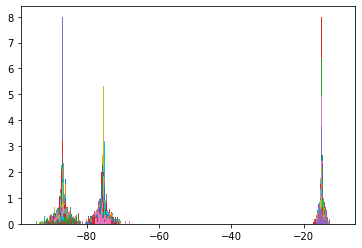

In [14]:
### bins for cone from histogramm: 


#bins_rd_mean_20=[]
bins_rd_mean_23=[]

bins_mean_20=[]
bins_mean_23=[]
bins_mean_22=[]

for l in np.arange(0, 99):
    bins_mean_20.append(plt.hist(all_means_1020[l], density=True, bins=y_alt_20)[0])
    bins_mean_23.append(plt.hist(all_means_1023[l], density=True, bins=y_alt_23)[0])
    bins_mean_22.append(plt.hist(all_means_1022[l], density=True, bins=y_alt_22)[0])
    #bins_rd_mean_20.append(plt.hist(rd_20_sub[0][l], density=True, bins=y_20)[0])
    #bins_rd_mean_23.append(plt.hist(rd_23_sub[0][l], density=True, bins=y_23)[0])

In [13]:
star_20= [y_alt_20[np.where(bins_mean_20[i]== np.max(bins_mean_20[i]))[0][0]] for i in range(99)]
star_23= [y_alt_23[np.where(bins_mean_23[i]== np.max(bins_mean_23[i]))[0][0]] for i in range(99)]

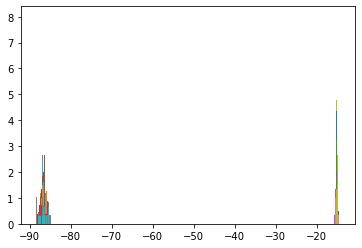

In [14]:
### bins for cone from histogramm: -- zoomed 

bound20_zoom=(-16.125,-14.125) # max and min of dataset sd1020 mean=-15.15
y_20_zoom = np.arange(bound20_zoom[0], bound20_zoom[1], 0.125)
bound23_zoom=(-88.5,-84.5) # max and min of dataset sd1020 - mean = -86.6
y_23_zoom = np.arange(bound23_zoom[0], bound23_zoom[1], 0.125)
#bins_rd_mean_20=[]
bins_rd_mean_23_zoom=[]

bins_mean_20_zoom=[]
bins_mean_23_zoom=[]
for l in np.arange(0, 25):
    bins_mean_20_zoom.append(plt.hist(all_means_1020[l], density=True, bins=y_20_zoom)[0])
    bins_mean_23_zoom.append(plt.hist(all_means_1023[l], density=True, bins=y_23_zoom)[0])
    #bins_rd_mean_20.append(plt.hist(rd_20_sub[0][l], density=True, bins=y_20)[0])
    #bins_rd_mean_23.append(plt.hist(rd_23_sub[0][l], density=True, bins=y_23)[0])

In [15]:
###saving the histogram bins
np.savetxt('hist_bins_mean_20_-21.25_-9.25_int0.125.txt', bins_mean_20)
np.savetxt('hist_bins_mean_23_-95_-75_int0.125.txt', bins_mean_23)

np.savetxt('hist_bins_RD_mean_20_-21.25_-9.25_int0.125.txt', bins_rd_mean_20)
np.savetxt('hist_bins_RD_mean_23_-95_-75_int0.125.txt', bins_rd_mean_23)

NameError: name 'bins_rd_mean_20' is not defined

In [15]:
#downloading the histogram means here ... 
bins_mean_20= np.genfromtxt('hist_bins_mean_20_-21.25_-9.25_int0.125.txt')
bins_mean_23= np.genfromtxt('hist_bins_mean_23_-95_-75_int0.125.txt')

rd_mean_20= np.genfromtxt('hist_bins_RD_mean_20_-21.25_-9.25_int0.125.txt')
rd_mean_23= np.genfromtxt('hist_bins_RD_mean_23_-95_-75_int0.125.txt')

In [16]:
#np.max(np.max(all_means_1023))
p_95_20= [np.percentile(all_means_1020[i],95) for i in range(99)]
p_95_23= [np.percentile(all_means_1023[i],95) for i in range(99)]

p_5_20= [np.percentile(all_means_1020[i],5) for i in range(99)]
p_5_23= [np.percentile(all_means_1023[i],5) for i in range(99)]

p_95_22= [np.percentile(all_means_1022[i],95) for i in range(99)]
p_5_22= [np.percentile(all_means_1022[i],5) for i in range(99)]

#p_5_rd20= [np.percentile(rd_20_sub[0][i],5) for i in range(99)]
#p_5_rd23= [np.percentile(rd_23_sub[0][i],5) for i in range(99)]

#p_95_rd20= [np.percentile(rd_20_sub[0][i],95) for i in range(99)]
#p_95_rd23= [np.percentile(rd_23_sub[0][i],95) for i in range(99)]

In [17]:
import matplotlib
import matplotlib.gridspec as gridspec



X20, Y20 = np.meshgrid(np.linspace(.5, 99.5, 100), y_20)
X23, Y23 = np.meshgrid(np.linspace(.5, 99.5, 100), y_23)
xb20=[]
xb20= [X20[0][i]+0.5 for i in range(99)] ##get the line centered on the boxes

b_20 = (np.array(bins_mean_20)/8)*100
b_23= (np.array(bins_mean_23)/8)*100
b_rd_20= (np.array(bins_rd_mean_20)/8)*100
b_rd_23= (np.array(bins_rd_mean_23)/8)*100


#b_20_zoom= (np.array(bins_mean_zoom_20)/8)*100
#b_22_zoom= (np.array(bins_mean_zoom_22)/8)*100
#b_23_zoom= (np.array(bins_mean_zoom_23)/8)*100

cmap = matplotlib.cm.get_cmap("inferno_r", 18)

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
spec = gridspec.GridSpec(ncols=4, nrows=4, figure=fig, height_ratios=[1,1, 1, 1])
ax1 = fig.add_subplot(spec[0:1, :])
ax2 = fig.add_subplot(spec[1:2, :])
ax3 = fig.add_subplot(spec[2:3, :])
ax4 = fig.add_subplot(spec[3:4, :])


ax1.title.set_text('Sd1020')
ax2.title.set_text('Random same mean and std as Sd1020')

ax3.title.set_text('Sd1023')
ax4.title.set_text('Random same mean and std as Sd1023')

c0 = ax1.pcolor(X20, Y20, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
l=2
ax1.plot(xb20, p_95_20, c='#0271cc', linewidth=l)
ax1.plot(xb20,p_5_20, c='#0271cc', linewidth=l)

c0 = ax2.pcolor(X20, Y20, b_rd_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
ax2.plot(xb20, p_95_rd20, c='#0271cc', linewidth=l)
ax2.plot(xb20,p_5_rd20, c='#0271cc', linewidth=l)

c0 = ax3.pcolor(X23, Y23, b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
ax3.plot(xb20, p_95_23, c='#0271cc', zorder=2, linewidth=l)
ax3.plot(xb20, p_5_23, c='#0271cc', linewidth=l)

c0 = ax4.pcolor(X23, Y23, b_rd_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
ax4.plot(xb20, p_95_rd23, c='#0271cc', linewidth=l)
ax4.plot(xb20,p_5_rd23, c='#0271cc', linewidth=l)

ax1.set_ylim(-23,-8)
ax2.set_ylim(-23,-8)
ax3.set_ylim(-95,-75)
ax4.set_ylim(-95,-75)
ax= [ax1, ax2, ax3, ax4]
for a in ax:
    a.set_ylabel('Qturb [W/m2]')

ax4.set_xlabel('sampling frequency [km]')
fig.savefig("cone_figure_randomdata_1020_1023t.png", bbox_inches='tight', facecolor='w')#, transparent=False)

NameError: name 'bins_rd_mean_20' is not defined

<ipython-input-18-098dc4ba9554>:57: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  c0 = ax1.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)
<ipython-input-18-098dc4ba9554>:64: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  c2 = ax2.pcolor(X3, Y3,b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
<ipython-input-18-098dc4ba9554>:72: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  c3 

NameError: name 'star_20' is not defined

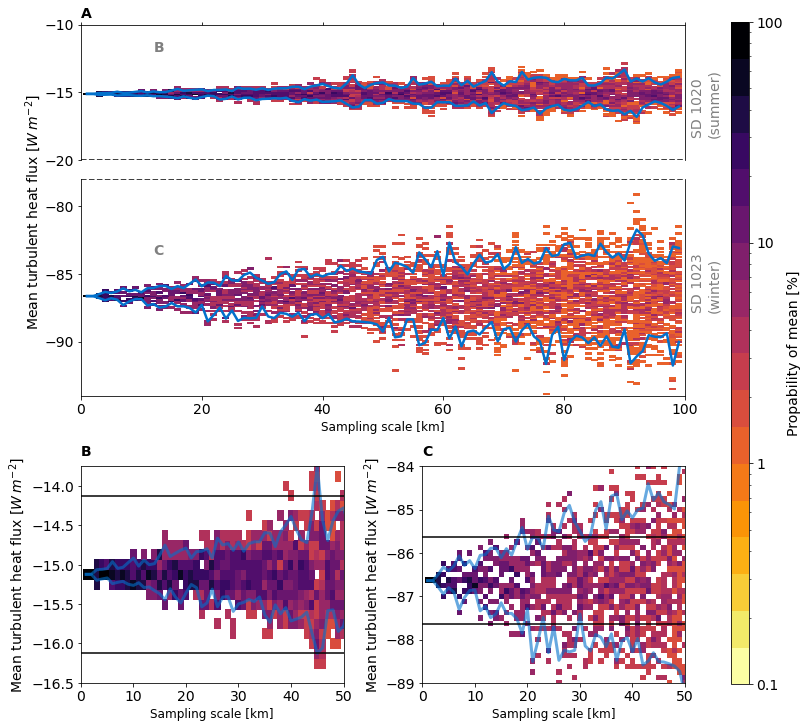

In [18]:
#### new figure: 
import matplotlib
import matplotlib.gridspec as gridspec

matplotlib.rcParams.update({'font.size':14})

b_20 = (np.array(bins_mean_20)/8)*100
#b_22=(np.array(bins_mean_22)/8)*100
b_23= (np.array(bins_mean_23)/8)*100

#b_20_zoom= (np.array(bins_mean_20_zoom)/8)*100
#b_22_zoom= (np.array(bins_mean_zoom_22)/8)*100
#b_23_zoom= (np.array(bins_mean_23_zoom)/8)*100

cmap = matplotlib.cm.get_cmap("inferno_r", 18)

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
spec = gridspec.GridSpec(ncols=4, nrows=3, figure=fig, height_ratios=[10/16*1, 1, 1])


ax1 = fig.add_subplot(spec[0:1, :])
ax2 = fig.add_subplot(spec[1:2, :])
ax3 = fig.add_subplot(spec[2:, :2])
ax4 = fig.add_subplot(spec[2:, 2:])

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labelbottom=False) 
ax1.xaxis.tick_top()
#ax1.set_xticks([])
ax1.hlines(bound20[0],0,100,linestyle='--', color= 'k')
ax2.hlines(bound23[1],0,100,linestyle='--', color= 'k')
ax3.hlines((all_means_1020[0][0]+1),0,100,linestyle='-', color= 'k')
ax3.hlines((all_means_1020[0][0]-1),0,100,linestyle='-', color= 'k')

ax4.hlines((all_means_1023[0][0]+1),0,100,linestyle='-', color= 'k')
ax4.hlines((all_means_1023[0][0]-1),0,100,linestyle='-', color= 'k')


axes= [ax1, ax2]
for a in axes: 
    a.set_xlim(0,100)
    #a.set_facecolor('k') # black background where there is no data


axes_small=[ax3,ax4]
for a in axes_small:
    a.set_xlim(0,50)
    #a.set_facecolor('k') # black background where there is no data

X, Y = np.meshgrid(np.linspace(.5, 99.5, 100), y_alt_20)
X3, Y3 = np.meshgrid(np.linspace(.5, 99.5, 100), y_alt_23)

c_per='#0271cc'#'#4965a8'#'royalblue'#'steelblue'#'grey'
l= 3

c0 = ax1.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())#, snap=True)
ax1.plot(np.linspace(1, 99, 99), p_95_20, c=c_per, linewidth=l-.5, label='95th percentile of means')
ax1.plot(np.linspace(1, 99, 99),p_5_20, c=c_per, linewidth=l-.5, label='5th percentile of means')
ax1.set_yticks(np.arange(-20, -5, step=5))
ax1.set_ylim(bound20[0],bound20[1])

#c1 = ax2.pcolor(X3, Y3, b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
c2 = ax2.pcolor(X3, Y3,b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
ax2.plot(np.linspace(1, 99, 99), p_95_23, c=c_per, linewidth=l-.5, label='95th percentile of means')
ax2.plot(np.linspace(1, 99, 99),p_5_23, c=c_per, linewidth=l-.5, label='5th percentile of means')
ax2.set_yticks(np.arange(-95, -75, step=5))
#[ax2.scatter(xaxis_23[i]+1.5, k_23[i]+0.2, marker= '*', color='w', alpha=0.5)for i in range(90)]

ax2.set_ylim(bound23[0],bound23[1])

c3 = ax3.pcolor(X, Y, b_20.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm())
ax3.set_ylim(-16.5,-13.75)
ax3.plot(np.linspace(1, 99, 99), p_95_20, c=c_per, linewidth=l, label='95th percentile of means', alpha=0.6, zorder=1)
ax3.plot(np.linspace(1, 99, 99),p_5_20, c=c_per, linewidth=l, label='5th percentile of means', alpha=0.6, zorder=1)
ax3.set_yticks(np.arange(-16.5, -13.5, step=.5))


##ax4 = fig.add_axes([0.18, 0.3, 0.2, 0.08])
c4 = ax4.pcolor(X3, Y3, b_23.transpose(), cmap=cmap, vmin= 0.1, vmax=100, norm=matplotlib.colors.LogNorm(), snap=True)
ax4.plot(np.linspace(1, 99, 99), p_95_23, c=c_per, linewidth=l, label='95th percentile of means', alpha=0.6, zorder=1)
ax4.plot(np.linspace(1, 99, 99), p_5_23, c=c_per, linewidth=l, label='5th percentile of means', alpha=0.6, zorder=1)
ax4.set_ylim(-89,-84)


axes= [ax2, ax3, ax4]
for a in axes:
    a.set_xlabel('Sampling scale [km]', fontsize= 12)
    a.set_ylabel('Mean turbulent heat flux [$W\:m^{-2}$]')
    #a.set_facecolor('k') # black background where there is no data
ax2.set_ylabel('Mean turbulent heat flux [$W\:m^{-2}$]', labelpad=1,y=.85)
#fig.subplots_adjust(top=1)
#fig.colorbar(c2, ax=ax2, label= 'mean of data sets wdiffrent start points [%]')
cbar_ax = fig.add_axes([1.01, 0.055, 0.025, 0.92])
cbar = fig.colorbar(c0, cax=cbar_ax  , label= 'Propability of mean [%]')
cbar.set_ticks([0.1,1,10,100])
cbar.set_ticklabels(['0.1','1','10','100'])
#cbar.set_label('Propability of mean [%]',fontsize=12)
ax1.annotate('A',xy=[0, 1.05], xycoords='axes fraction', color='k', weight='bold')
ax1.annotate('B',xy=[0.12, 0.8], xycoords='axes fraction', color='gray', weight='bold')
ax2.annotate('C',xy=[0.12, 0.65], xycoords='axes fraction', color='gray', weight='bold')

ax3.annotate('B',xy=[0, 1.05], xycoords='axes fraction', color='k', weight='bold')
ax4.annotate('C',xy=[0, 1.05], xycoords='axes fraction', color='k', weight='bold')

ax1.text(101,all_means_1020[0][0]-3,'SD 1020\n(summer)', rotation=90, color= 'grey')
ax2.text(101,all_means_1023[0][0]-1,'SD 1023\n(winter)', rotation=90, color= 'grey')
xaxis_20=np.linspace(1, 99, 99)
#axis_23=np.linspace(1, 101, 100)
co='steelblue'
a=1
[ax3.scatter(xaxis_20[i], star_20[i]+0.0625, marker= 'o', color=co, alpha= a, s=20, zorder=2) for i in range(50)]
[ax4.scatter(xaxis_20[i], star_23[i]+0.0625, marker= 'o', color=co, alpha=a, s=10, zorder=2) for i in range(50)]

import matplotlib.patches as patches
from matplotlib.patches import Rectangle
#ax3.scatter(np.linspace(1, 99, 99), star_20)
#plt.scatter(range(99), star_23)



ax1.add_patch(Rectangle((0 + .1, -16.5 - .1), 50, 3, fill=None, alpha=1, color='gray', linewidth= 2))
ax2.add_patch(Rectangle((0 + .1, -89 - .1), 50, 5, fill=None, alpha=1, color='gray', linewidth= 2))
#fig.subplots_adjust(hspace = .05)
#fig.savefig("theCone.pdf", bbox_inches='tight', transparent=True)

## Delta: 90% data and uncertainty plot 

In [19]:
delta_23= np.zeros(99)
delta_20= np.zeros(99)
delta_22= np.zeros(99)

for i in range(99):
    delta_23[i] = abs(p_5_23[i]-p_95_23[i])
    delta_20[i] = abs(p_5_20[i]-p_95_20[i])
    delta_22[i] = abs(p_5_22[i]-p_95_22[i])

In [20]:
df=pd.DataFrame(delta_20)
df.to_csv('delta_20.csv')
df=pd.DataFrame(delta_22)
df.to_csv('delta_22.csv')
df=pd.DataFrame(delta_23)
df.to_csv('delta_23.csv')
#read in
#df=pd.read_csv('data.csv') 

In [21]:
SD= [r20_list, r22_list,r23_list]
i=2
print(np.median(SD[i]))
print(np.mean(SD[i]))
print(np.min(SD[i]))
print(np.max(SD[i]))


-80.36293316976708
-86.6409089876704
-343.11460113144204
26.588813040565892


In [ ]:
###### POWER DENSITY SPECTRUM ANALYSIS ###########

In [7]:
def plot_slope(xf,yf,N,fmin,fmax):
    """
    Output slope of spectral using defined boundaries
    Author:Issabelle Giddy
    """
    i=np.nonzero((xf>=fmin)&(xf<=fmax)&(xf!=0))[0]
    xf=xf[i]
    yf=yf[i]
   # y=2.0/N * np.abs(yf[0:N//2])
    Y=np.log(yf)
    X=np.log(xf)
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
    #confidence_interval = 2.58*std_err #99%
    confidence_interval = 1.96*std_err #95%
    p=np.polyfit(X,Y,1)
    offy=1
    trend=np.exp(p[0]*X+p[1]+offy)
    xvalue=xf
    return trend,slope,xvalue,confidence_interval



In [8]:
def plot_ref_slope(fmin,fmax,f,ax,kvec=[2],col='k',lw=2):
    """ This function draws reference slopes (k=-2, k=-4 for instance)
    Arguments:
    fmin=frequency where to start the reference the slope
    fmax=fmin=frequency where to end the reference the slope
    f= y intercept of the slope
    ax=the axes in which the slopes are plotted
    Optional arguments:
    kvec=[2]: list containing the reference values of k, whose slope to draw
    col='k': colors of the slopes
    lw=2: linewidths of the slopes
    ls=--: linestyles of the slopes
    Author: Nicolas Barrier
    """
    x=np.linspace(fmin,fmax,5)
    linestyle=['dotted','dashed','dashdot']
    for p,i in enumerate(range(0,len(kvec))):
        k=kvec[p]
        y=np.log(f)+k*(np.log(fmin)-np.log(x[:]))
        yout=np.exp(y)
        ax.loglog(x,yout,color=col,linewidth=lw,ls=linestyle[i])
#########
plot_ref_slope(0.03,0.33,1e-5,ax=ax0)

In [4]:
############shortcut from here to PSD anaylsis##############


import matplotlib

import pandas as pd
import numpy as np 

data= pd.read_csv('delta_20.csv')['0'].values
data22= pd.read_csv('delta_22.csv')['0'].values
data23= pd.read_csv('delta_23.csv')['0'].values



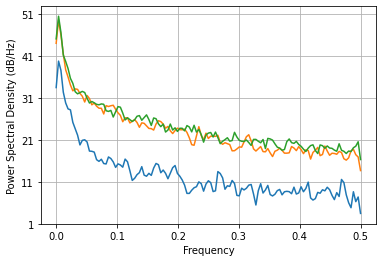

In [36]:
from scipy.optimize import curve_fit
w= 128
wd= 256
#p, f, line= matplotlib.pyplot.psd(data, Fs= 1, return_line=True, window= np.hamming(wd),  detrend='linear',noverlap= w, NFFT=wd)
#p22, f22, line22= matplotlib.pyplot.psd(data22, Fs= 1, window= np.hamming(wd), return_line=True, detrend='linear',noverlap= w,  NFFT=wd)
#p23, f23, line23= matplotlib.pyplot.psd(data23, Fs= 1, window= np.hamming(wd), return_line=True, detrend='linear',noverlap= w, NFFT=wd)

p, f, line= matplotlib.pyplot.psd(r20_list, Fs= 1, return_line=True, window= np.hamming(wd),  detrend='linear',noverlap= w, NFFT=wd)

p22, f22, line22= matplotlib.pyplot.psd(r22_list, Fs= 1, window= np.hamming(wd), return_line=True, detrend='linear',noverlap= w,  NFFT=wd)
p23, f23, line23= matplotlib.pyplot.psd(r23_list, Fs= 1, window= np.hamming(wd), return_line=True, detrend='linear',noverlap= w, NFFT=wd)


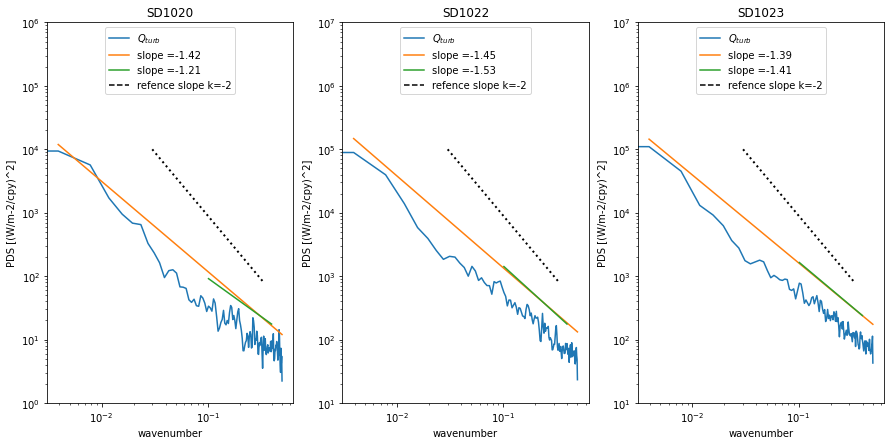

In [51]:
#(Px, F, ax,fmin=None,fmax=None,col='k',lin='--',lw=2,offy=1
import matplotlib.pyplot as plt
fig,(ax0,ax1,ax2)= plt.subplots(1,3, figsize=[15,7])


ax0.loglog(f,p, label='$Q_{turb}$ ')
trend, slope, xvalue, conf_interval=plot_slope(f,p,len(data),fmin=0.002,fmax=0.6)
ax0.loglog(xvalue, trend, label='slope ='+str(np.round(slope,2)))

trend1, slope1, xvalue1, conf_interval1=plot_slope(f,p,len(data),fmin=0.1,fmax=0.4)
ax0.loglog(xvalue1,trend1, label='slope ='+str(np.round(slope1,2)))
ax0.plot([],[], '--',color='k', label='refence slope k=-2')
#ax0.legend()
plot_ref_slope(0.03, 0.33, 1e4,ax=ax0) #plot_ref_slope(fmin, fmax , location_yaxis, axis)
ax0.set_title('SD1020')

######22########
ax1.loglog(f22,p22, label='$Q_{turb}$')
trend22, slope22, xvalue22, conf_interval22=plot_slope(f22,p22,len(data22),fmin=0.002,fmax=0.6)
ax1.loglog(xvalue22, trend22, label='slope ='+str(np.round(slope22,2)))

trend22, slope22, xvalue22, conf_interval22=plot_slope(f22,p22,len(data22),fmin=0.1,fmax=0.4)
ax1.loglog(xvalue22,trend22, label='slope ='+str(np.round(slope22,2)))
ax1.plot([],[], '--',color='k', label='refence slope k=-2')
plot_ref_slope(0.03, 0.33, 1e5,ax=ax1) #plot_ref_slope(fmin, fmax , location_yaxis, axis)
ax1.set_title('SD1022')

######23########
ax2.loglog(f23,p23, label='$Q_{turb}$ ')
trend23, slope23, xvalue23, conf_interval23=plot_slope(f23,p23,len(data23),fmin=0.002,fmax=0.6)
ax2.loglog(xvalue23, trend23, label='slope ='+str(np.round(slope23,2)))

trend23, slope23, xvalue23, conf_interval23=plot_slope(f23, p23, len(data23),fmin=0.1,fmax=0.4)
ax2.loglog(xvalue23,trend23, label='slope ='+str(np.round(slope23, 2)))
ax2.plot([],[], '--',color='k', label='refence slope k=-2')
#ax2.legend()
plot_ref_slope(0.03, 0.33, 1e5,ax=ax2) #plot_ref_slope(fmin, fmax , location_yaxis, axis)
ax2.set_title('SD1023')

ax2.set_ylim(10, 1e7)
ax1.set_ylim(10, 1e7)
ax0.set_ylim(1, 1e6)

for ax in [ax0,ax1,ax2]:
    ax.set_xlabel('wavenumber')
    ax.set_ylabel('PDS [(W/m-2/cpy)^2]')
    ax.legend(loc='upper center')

#fig.savefig("PDS_analysis_THF_allSDs.pdf", bbox_inches='tight', transparent=True)

In [ ]:
########## END PDS ANALYSIS #######################

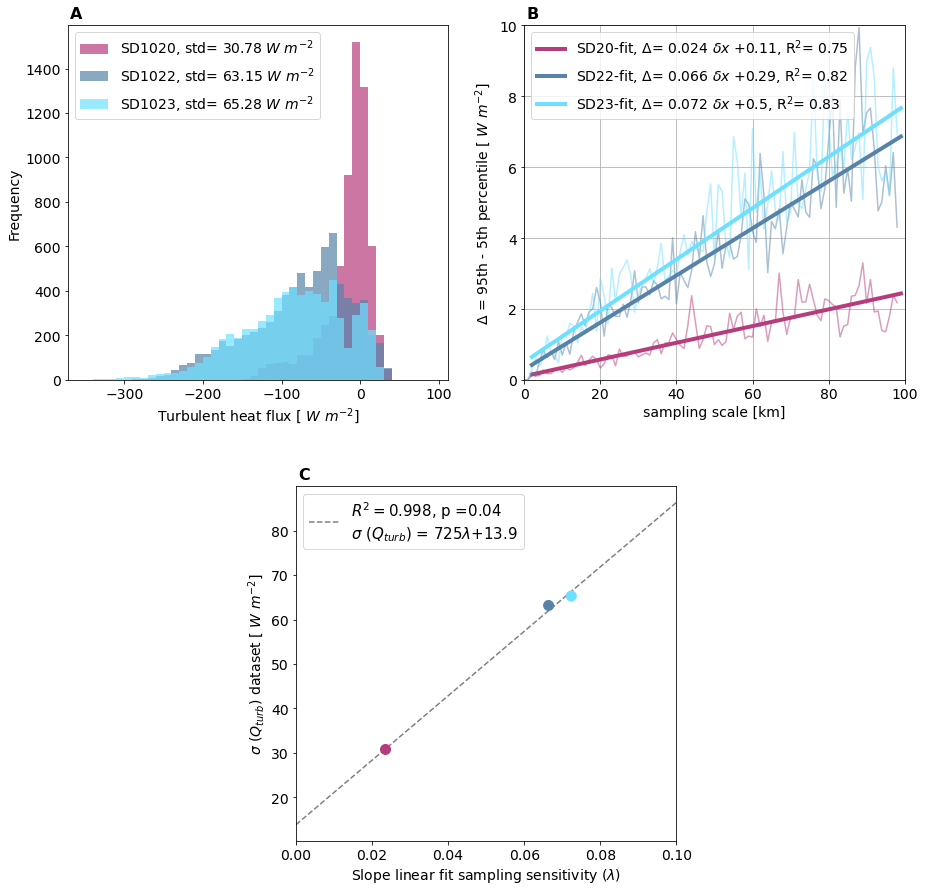

In [67]:
### 
fig2 = plt.figure(figsize=[15,15])

grid = plt.GridSpec(2, 4, wspace=0.5, hspace=0.3,figure=fig2 )

ax1= plt.subplot(grid[0,:2])
ax2= plt.subplot(grid[0,2:])
ax3= plt.subplot(grid[1,1:3])

#----------------------------------------------------------------------------------------------------#
#--------------------AX1-----------------------------------------------------------------------------#

col=['#b53c7d',"#5783a8","#6ee0ff"]# colors from Map ( blues and purple)
a= 0.7 #alpha
bins=np.arange(-350, 100, 10)
ax1.hist(r20_list, bins=bins, color=col[0], alpha=a, label='SD1020, std= '+str(np.round(np.std(r20_list),2))+'$~W~m^{-2}$')
ax1.hist(r22_list, bins=bins, color=col[1], alpha=a, label='SD1022, std= '+str(np.round(np.std(r22_list),2))+'$~W~m^{-2}$'   )
ax1.hist(r23_list, bins=bins, color=col[2], alpha= a, label='SD1023, std= '+str(np.round(np.std(r23_list),2))+'$~W~m^{-2}$')

ax1.legend()
ax1.set_xlabel('Turbulent heat flux [$~W~m^{-2}$]')
ax1.set_ylabel('Frequency')
#----------------------------------------------------------------------------------------------------#
#--------------------AX2-----------------------------------------------------------------------------#

from scipy.optimize import curve_fit

def func(x,a, b):
    return a*x + b
#def func(x, b):
#    return np.sqrt(b*(x-1))
#def func(x, b, offset):
 #   return np.sqrt(b*(x-1))-offset    
#def func(x,a, b):
#    return a*np.sqrt(b*x)    
    
x = np.arange(1,100)[1:]
#popt20,pcov = curve_fit(lin_func,x,delta_20)
#popt22,pcov = curve_fit(lin_func,x,delta_22)
#popt23,pcov = curve_fit(lin_func,x,delta_23)

popt20,pcov = curve_fit(func, x, delta_20[1:])
popt22,pcov = curve_fit(func, x, delta_22[1:])
popt23,pcov = curve_fit(func, x, delta_23[1:])
#    N=np.arange(1,100)

#----------------ADD R2 value-------------------------------

# WANT TO ADD R2 values in liear fit, 
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt

#def linefitline(a, b):
 #   a + return slope * b
#creating OLS regression
#slope, intercept, r_value, p_value, std_err = stats.linregress(x, delta_20)
r2_SD1020 = r2_score(delta_20[1:], func(x,*popt20))
#r2_SD1020=r_value**2
#slope, intercept, r_value, p_value, std_err = stats.linregress(x, delta_22)
r2_SD1022 = r2_score(delta_22[1:], func(x,*popt22))
#r2_SD1022=r_value**2
#slope, intercept, r_value, p_value, std_err = stats.linregress(x, delta_23)
r2_SD1023 = r2_score(delta_23[1:], func(x,*popt23))
#r2_SD1023=r_value**2
#

al= 0.5
ax2.plot(delta_20,c=col[0], alpha=al)
#ax2.plot(x,lin_func(x,*popt20),c=col[0],linewidth=4, label='SD20-fit, y= %.3f'%(np.round(popt20[0],3))+'x, R$^2$= ' +str(np.round(r2_SD1020,2) ))
ax2.plot(x,func(x,*popt20),c=col[0],linewidth=4, label='SD20-fit, $\Delta$= %.3f '%(np.round(popt20[0],3))+'$\delta x$ +'+str(np.round(popt20[1],2))+', R$^2$= ' +str(np.round(r2_SD1020,2) )) 
####LABEL: 
#label='SD20-fit, $\Delta$= sqrt(%.3f*N-1), R$^2$=%.2f'%(np.round(popt20[0],3),  np.round(r2_SD1020,2) ))

ax2.plot(delta_22,c=col[1], alpha=al)
ax2.plot(x,func(x,*popt22),c=col[1],linewidth=4,zorder=10,label='SD22-fit, $\Delta$= %.3f '%(np.round(popt22[0],3))+'$\delta x$ +'+str(np.round(popt22[1],2))+', R$^2$= ' +str(np.round(r2_SD1022,2) ))
#label='SD22-fit; y= %.3f'%(np.round(popt22[0],3))+'x, R$^2$= ' +str(np.round(r2_SD1022,2) ) 
ax2.plot(delta_23,c=col[2], alpha=al)
ax2.plot(x,func(x,*popt23),c=col[2],linewidth=4,label='SD23-fit, $\Delta$= %.3f '%(np.round(popt23[0],3))+'$\delta x$ +'+str(np.round(popt23[1],2))+', R$^2$= ' +str(np.round(r2_SD1023,2) ))
#label='SD23-fit; y= %.3f'%(np.round(popt23[0],3))+'x, R$^2$= ' +str(np.round(r2_SD1023,2) ) 
ax2.legend(fontsize=14)
ax2.set_xlim(0,100)

ax2.set_ylim(0,10)
ax2.grid()
ax2.set_xlabel('sampling scale [km]')
ax2.set_ylabel('$\Delta$ = 95th - 5th percentile [$~W~m^{-2}$]')
#----------------------------------------------------------------------------------------------------#
#--------------------AX3-----------------------------------------------------------------------------#
#col=["#7FBF7F",'#8EBAD9',"#FFBE86"]
def linefitline_b(x,b,a):
    return a+ b*x

def lin_func_b(x,a):
    return a*x
x= [popt20[0], popt22[0], popt23[0]]
x_new=np.linspace(0,.1,21)

y= [ np.std(r20_list),  np.std(r22_list), np.std(r23_list)]
popt, pcov = curve_fit(linefitline_b,x,y)

big=100

ax3.scatter(x,y, color=col, s=big, zorder=15)
#ax3.scatter(popt20, np.std(r20_list), color=col[0], label='SD1020', s=big, zorder=15)
#ax3.scatter(popt22, np.std(r22_list), color=col[1], label='SD2022',s=big)
#ax3.scatter(popt23, np.std(r23_list), color=col[2], label='SD1023',s=big)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax3.plot(x_new, linefitline_b(x_new,*popt),'--', color='grey' ,label='$R^{2} = $'+str(np.round(r_value,3))+', p ='+str(np.round(p_value,2))+'\n$\sigma~(Q_{turb})$ = %.0f$\lambda $+%.1f'%(popt[0],popt[1]))

ax3.set_xlabel('Slope linear fit sampling sensitivity ($\lambda$)')
ax3.legend(fontsize=15)
ax3.set_ylabel('$\sigma~(Q_{turb})$ dataset [$~W~m^{-2}$]')
ax3.set_xlim(0,0.1)

lab=['A', 'B', 'C']
axes=[ax1,ax2,ax3]
  
for i in range(3): 
    axes[i].annotate(lab[i],xy=[0.005, 1.02],fontsize=16, xycoords='axes fraction', color='k', weight='bold')

#fig2.savefig("Fig5_S2_linearfit_20sept22.pdf", bbox_inches='tight', facecolor='w')#, transparent=False)

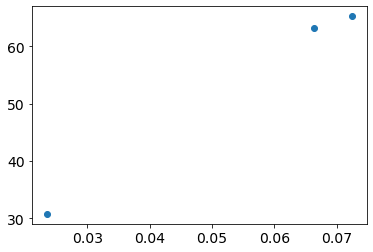

In [31]:
x= [popt20[0], popt22[0], popt23[0]]
x_new=np.linspace(0,.1,21)

y= [ np.std(r20_list),  np.std(r22_list), np.std(r23_list)]
plt.scatter(x,y)

Text(0, 0.5, 'frequency')

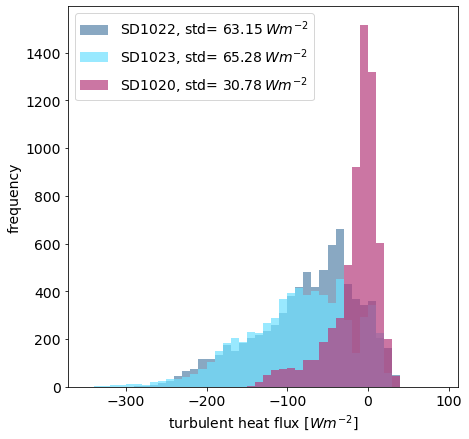

In [23]:
col=['#b53c7d',"#5783a8","#6ee0ff"]# colors from Map ( blues and purple)
a= 0.7 #alpha
bins=np.arange(-350, 100, 10)
plt.rcParams["figure.figsize"] = (7,7)### Adjust figures size, so legend is not overlaping with data

plt.hist(r22_list, bins=bins, color=col[1], alpha=a, label='SD1022, std= '+str(np.round(np.std(r22_list),2))+'$\:W m^{-2}$'   )
plt.hist(r23_list, bins=bins, color=col[2], alpha= a, label='SD1023, std= '+str(np.round(np.std(r23_list),2))+'$\:W m^{-2}$')
plt.hist(r20_list, bins=bins, color=col[0], alpha=a, label='SD1020, std= '+str(np.round(np.std(r20_list),2))+'$\:W m^{-2}$')
plt.legend()
plt.xlabel('turbulent heat flux [$W m^{-2}$]')
plt.ylabel('frequency')

#plt.savefig("detrend/SDs_heatflux_variablity_1kmgridded_colors.pdf", bbox_inches='tight', facecolor='w')#, transparent=False)

0.7377535336726715
0.8042246505515694
0.7871934632479287


Text(0, 0.5, '$\\Delta$ = 95th - 5th percentile [W$m^{-2}$]')

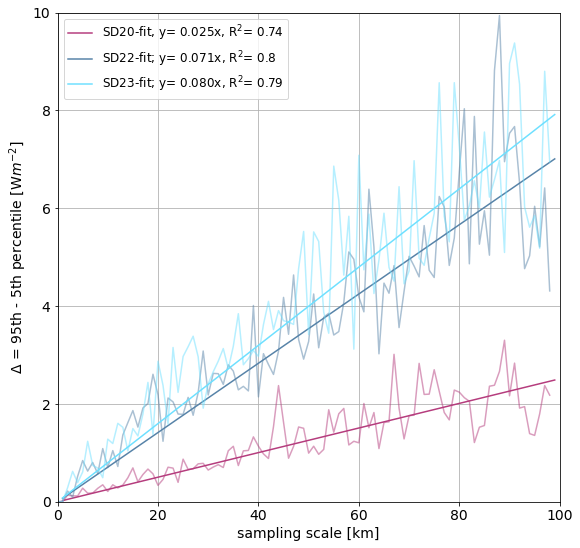

In [24]:
from scipy.optimize import curve_fit

def lin_func(x,a):
    return a*x

x = np.arange(1,100)
popt20,pcov = curve_fit(lin_func,x,delta_20)
popt22,pcov = curve_fit(lin_func,x,delta_22)
popt23,pcov = curve_fit(lin_func,x,delta_23)

#----------------ADD R2 value-------------------------------

# WANT TO ADD R2 values in liear fit, 
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt

def linefitline(b):
    return slope * b
#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,delta_20)
r2_SD1020 = r2_score(delta_20, linefitline(x))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,delta_22)
r2_SD1022 = r2_score(delta_22, linefitline(x))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,delta_23)
r2_SD1023 = r2_score(delta_23, linefitline(x))
print(r2_SD1020)
print(r2_SD1022)
print(r2_SD1023)
#------------------------------------------------------------

plt.rcParams["figure.figsize"] = (9,9)### Adjust figures size, so legend is not overlaping with data

#col=["#FFBE86","#7FBF7F",'#8EBAD9'] # blue, green and orange
col=['#b53c7d',"#5783a8","#6ee0ff"]# colors from Map ( blues and purple)
a= 0.5
plt.plot(delta_20,c=col[0], alpha=a)
plt.plot(x,lin_func(x,*popt20),c=col[0],label='SD20-fit, y= %.3f'%(np.round(popt20[0],3))+'x, R$^2$= ' +str(np.round(r2_SD1020,2) ))


plt.plot(delta_22,c=col[1], alpha=a)
plt.plot(x,lin_func(x,*popt22),c=col[1],label='SD22-fit; y= %.3f'%(np.round(popt22[0],3))+'x, R$^2$= ' +str(np.round(r2_SD1022,2) ) )

plt.plot(delta_23,c=col[2], alpha=a)
plt.plot(x,lin_func(x,*popt23),c=col[2],label='SD23-fit; y= %.3f'%(np.round(popt23[0],3))+'x, R$^2$= ' +str(np.round(r2_SD1023,2) ) )

plt.legend(fontsize=12)
plt.xlim(0,100)

plt.ylim(0,10)
plt.grid()
plt.xlabel('sampling scale [km]')
plt.ylabel('$\Delta$ = 95th - 5th percentile [W$m^{-2}$]')
#plt.savefig("S1A_SDsdelta_90percentofdata_uncertainity_colors.pdf", bbox_inches='tight', facecolor='w')#, transparent=False)

In [108]:
y

[30.78129572671089, 63.15309821937583, 65.27916342113261]

(0.0, 0.1)

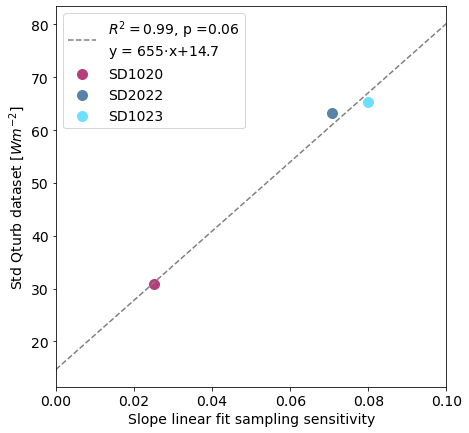

In [25]:
#col=["#7FBF7F",'#8EBAD9',"#FFBE86"]
def linefitline_b(x,b,a):
    return a+ b*x

def lin_func_b(x,a):
    return a*x
x= [popt20[0], popt22[0], popt23[0]]
#x_new = np.arange(1,100)x
x_new=np.linspace(0,.1,21)

y= [ np.std(r20_list),  np.std(r22_list), np.std(r23_list)]
popt, pcov = curve_fit(linefitline_b,x,y)

#coef = np.polyfit(x,y,1)
#poly1d_fn = np.poly1d(coef)
plt.rcParams["figure.figsize"] = (7,7)
#plt.rcParams["figure.figsize"] = (6,6)### Adjust figures size, so legend is not overlaping with data
plt.plot()
big=100
plt.scatter(popt20, np.std(r20_list), color=col[0], label='SD1020', s=big)
plt.scatter(popt22, np.std(r22_list), color=col[1], label='SD2022',s=big)
plt.scatter(popt23, np.std(r23_list), color=col[2], label='SD1023',s=big)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x_new,linefitline_b(x_new,*popt),'--', color='grey' ,label='$R^{2} = $'+str(np.round(r_value,2))+', p ='+str(np.round(p_value,2))+'\ny = %.0f$\cdot$x+%.1f'%(popt[0],popt[1]))

plt.xlabel('Slope linear fit sampling sensitivity')
plt.legend()
plt.ylabel('Std Qturb dataset [$Wm^{-2}$]')
plt.xlim(0,0.1)
#plt.savefig("detrend/SDsdelta_slope_linefit.pdf", bbox_inches='tight', facecolor='w')#, transparent=False)

In [129]:
popt[0]

655.0243691207754

In [70]:
x= [[popt20[0], popt22[0], popt23[0]]
x

array([[0.02514171],
       [0.0707984 ],
       [0.07995586]])

In [ ]:
# plot linear fit paramerte and std of dataset: 
print(np.std(r20_list))
print(np.std(r22_list))
print(np.std(r23_list))